In [0]:
from keras.layers import Dense, Input
from keras.models import Model

In [3]:
# number of features in reduced dimension
encoding_dim = 32

# input layer
input_img = Input(shape=(784,))

# encoded layer
encoded = Dense(encoding_dim, activation='relu')(input_img)

# decoded layer
decoded = Dense(784, activation='sigmoid')(encoded)

# maps input image to the encoded image
encoder = Model(input_img, encoded)

# maps input image to its reconstructed version
autoencoder = Model(inputs=input_img, outputs=decoded)

In [12]:
# input layer for encoded image
encoded_input = Input(shape=(encoding_dim,))

# decoder layer
decoder_layer = autoencoder.layers[-1]

# decoder model
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape(len(x_train), 784)
x_test = x_test.reshape(len(x_test), 784)

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
autoencoder.fit(x_train, x_train,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.3505 - val_loss: 0.2709
Epoch 2/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.2633 - val_loss: 0.2518
Epoch 3/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.2421 - val_loss: 0.2304
Epoch 4/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.2227 - val_loss: 0.2124
Epoch 5/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.2069 - val_loss: 0.1990
Epoch 6/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.1954 - val_loss: 0.1894
Epoch 7/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.1867 - val_loss: 0.1815
Epoch 8/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.1796 - val_loss: 0.1749
Epoch 9/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.1735 - val_loss: 0.1694
Epoch

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

0.09862608340929965


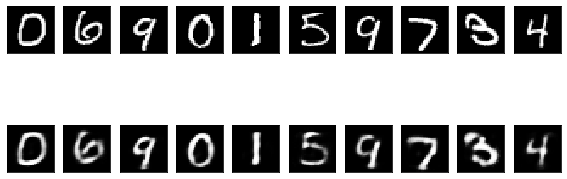

In [0]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [0]:
autoencoder.fit(x_train, x_train,
               epochs=100,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.6729 - val_loss: 0.6485
Epoch 2/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.6284 - val_loss: 0.6090
Epoch 3/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.5916 - val_loss: 0.5749
Epoch 4/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.5598 - val_loss: 0.5454
Epoch 5/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.5323 - val_loss: 0.5198
Epoch 6/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.5084 - val_loss: 0.4975
Epoch 7/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.4875 - val_loss: 0.4780
Epoch 8/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.4692 - val_loss: 0.4609
Epoch 9/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.4531 - val_loss: 0.

In [7]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

input_img = Input((784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
               epochs=100,
               batch_size = 256,
               shuffle=True,
               validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.3572 - val_loss: 0.2637
Epoch 2/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.2567 - val_loss: 0.2469
Epoch 3/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2342 - val_loss: 0.2257
Epoch 4/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2230 - val_loss: 0.2180
Epoch 5/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2133 - val_loss: 0.2082
Epoch 6/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2022 - val_loss: 0.1933
Epoch 7/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.1893 - val_loss: 0.1831
Epoch 8/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.1814 - val_loss: 0.1770
Epoch 9/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.1755 - val_loss: 0.1